In [1]:
import matplotlib.pyplot as plt
import random
import keras
import tensorflow as tf
%config Completer.use_jedi = True


2025-10-17 14:30:32.015598: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
class MNIST:
    def __init__(self):
        self.num_classes = 10
    def preProcess(self,mnist_images, flatten=False):
        mnist_images= mnist_images/255
        if(flatten):
            mnist_images=mnist_images.reshape(mnist_images.shape[0],-1)
        return mnist_images
        
    def LoadDataSet(self):
        from keras.datasets import mnist
        ((X_train,Y_train), (X_test,Y_test))= mnist.load_data()
        
        
        fig,axes = plt.subplots(1,self.num_classes)

        for i in range(self.num_classes):
            X_trainOfClass = X_train[Y_train==i]
            image = X_trainOfClass[random.randint(0,X_trainOfClass.shape[0])]
            axes[i].imshow(image)
            axes[i].set_title(f"L_{i}")
        
        #GT to one-hot vector
        Y_train =keras.utils.to_categorical(Y_train, self.num_classes)
        Y_test  =keras.utils.to_categorical(Y_test , self.num_classes)

        return ((X_train,Y_train), (X_test,Y_test))
    def build_modelnn(self):
        from keras.layers import Dense,Dropout
        from keras.optimizers import Adam
        from keras.metrics import AUC, Precision, Recall
        model = keras.models.Sequential()
        model.add(Dense(units = 128, input_shape=(28*28,), activation='relu'))
        model.add(Dense(units = 128, activation='relu'))
        model.add(Dropout(0.2))
        model.add(Dense(units=self.num_classes,activation='softmax'))

        model.compile(loss='categorical_crossentropy',optimizer = Adam(learning_rate=0.001), metrics=['accuracy',AUC(),Precision(),Recall()])

        return model
                  
        

/home/smriti/Documents/Practice/myPy3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

None


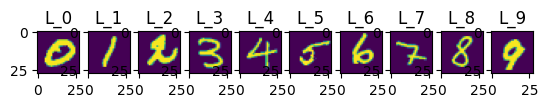

In [3]:
obj = MNIST()
((X_train,Y_train), (X_test,Y_test)) =obj.LoadDataSet()
X_train = obj.preProcess(X_train, flatten=True)
X_test = obj.preProcess(X_test, flatten=True)

model = obj.build_modelnn()
print(model.summary())

In [4]:
#train the model
history=model.fit(x=X_train, y=Y_train, batch_size=32, epochs=10)

Epoch 1/10


2025-10-17 14:31:35.121538: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9252 - auc: 0.9948 - loss: 0.2505 - precision: 0.9517 - recall: 0.9026
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9674 - auc: 0.9983 - loss: 0.1058 - precision: 0.9726 - recall: 0.9635
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9758 - auc: 0.9989 - loss: 0.0772 - precision: 0.9792 - recall: 0.9730
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9807 - auc: 0.9992 - loss: 0.0601 - precision: 0.9832 - recall: 0.9789
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9840 - auc: 0.9994 - loss: 0.0485 - precision: 0.9861 - recall: 0.9828
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9878 - auc: 0.9995 - loss: 0.0391 - precision: 0.9891 - recall: 0.9865
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9887 - auc: 0.9995 - loss: 0.0352 - precision: 0.9898 - recall: 0.9878
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━

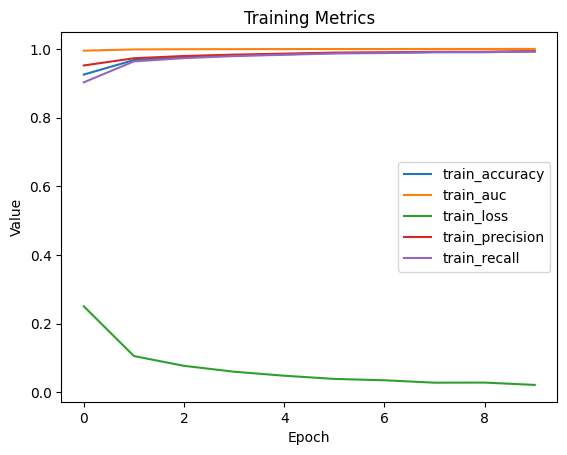

In [5]:
#plot the training metrics
metrics = list(history.history.keys())
for each in metrics:
    plt.plot(history.history[each], label=f"train_{each}")
plt.title('Training Metrics')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.show()

In [6]:
#evaluate the model
results_test = model.evaluate(X_test, Y_test)
results_train = model.evaluate(X_train, Y_train)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9795 - auc: 0.9978 - loss: 0.0806 - precision: 0.9812 - recall: 0.9788
  19/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9992 - auc: 1.0000 - loss: 0.0117 - precision: 0.9992 - recall: 0.9992   

2025-10-17 14:33:12.312597: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9951 - auc: 0.9999 - loss: 0.0146 - precision: 0.9954 - recall: 0.9947


In [7]:
#compare training vs testing metrics to check for overfitting or underfitting
print(dict(zip(metrics,results_train)))
print(dict(zip(metrics,results_test)))

{'accuracy': 0.014610478654503822, 'auc': 0.9951333403587341, 'loss': 0.9999043941497803, 'precision': 0.9954464435577393, 'recall': 0.9946666955947876}
{'accuracy': 0.08060932159423828, 'auc': 0.9794999957084656, 'loss': 0.9977841973304749, 'precision': 0.9811547994613647, 'recall': 0.9787999987602234}


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[ 971    0    1    1    1    1    1    0    3    1]
 [   0 1126    1    2    0    0    2    2    2    0]
 [   1    2 1012    3    1    0    1    7    5    0]
 [   0    0    3  989    0    5    0    7    3    3]
 [   0    2    5    1  967    0    3    1    0    3]
 [   2    0    0    7    2  873    2    0    5    1]
 [   4    2    0    1    7    4  939    0    1    0]
 [   0    2    6    1    0    0    0 1013    2    4]
 [   5    1    4    6    2    1    3    8  940    4]
 [   2    3    3    3   14    7    1    8    3  965]]


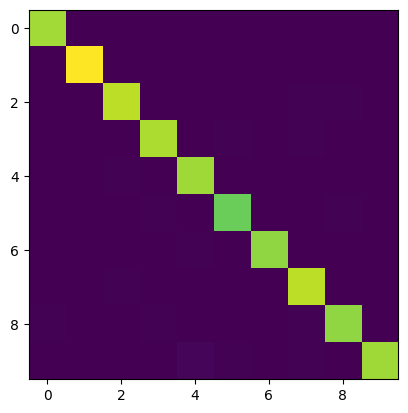

In [19]:
#plot the confusion matrix using sklearn
from sklearn.metrics import confusion_matrix
import numpy as np

#get predictions from model for X_test
predictions = model.predict(X_test)
class_preds = np.argmax(predictions,axis=1)

class_gt = np.argmax(Y_test,axis=1)
confusion_mat = confusion_matrix(class_gt,class_preds)
plt.imshow(confusion_mat)
print(confusion_mat)

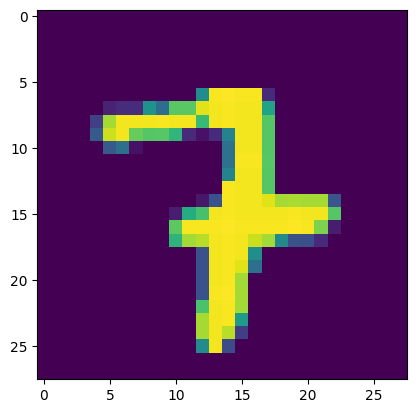

In [9]:
#display a random image   
index = random.randint(0,(X_train).shape[0])
image = X_train[index]
plt.imshow(image.reshape(28,28))
